# 第4章: 形態素解析
言語処理100本ノック (https://nlp100.github.io/ja/) の第4章です。

## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [1]:
with open("neko.txt.mecab", "r") as f:
    raw_mecab_list = f.readlines()


In [2]:
raw_mecab_list[:10]

['一\t名詞,数,*,*,*,*,一,イチ,イチ\n',
 'EOS\n',
 'EOS\n',
 '\u3000\t記号,空白,*,*,*,*,\u3000,\u3000,\u3000\n',
 '吾輩\t名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ\n',
 'は\t助詞,係助詞,*,*,*,*,は,ハ,ワ\n',
 '猫\t名詞,一般,*,*,*,*,猫,ネコ,ネコ\n',
 'で\t助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ\n',
 'ある\t助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル\n',
 '。\t記号,句点,*,*,*,*,。,。,。\n']

In [3]:
# 末尾改行記号の除去
text_list = [s.rstrip() for s in raw_mecab_list]
text_list[:10]

['一\t名詞,数,*,*,*,*,一,イチ,イチ',
 'EOS',
 'EOS',
 '\u3000\t記号,空白,*,*,*,*,\u3000,\u3000,',
 '吾輩\t名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ',
 'は\t助詞,係助詞,*,*,*,*,は,ハ,ワ',
 '猫\t名詞,一般,*,*,*,*,猫,ネコ,ネコ',
 'で\t助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ',
 'ある\t助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル',
 '。\t記号,句点,*,*,*,*,。,。,。']

In [4]:
# 空行の除去
text_list = [l for l in text_list if len(l.split(",")) > 1]
text_list[:10]

['一\t名詞,数,*,*,*,*,一,イチ,イチ',
 '\u3000\t記号,空白,*,*,*,*,\u3000,\u3000,',
 '吾輩\t名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ',
 'は\t助詞,係助詞,*,*,*,*,は,ハ,ワ',
 '猫\t名詞,一般,*,*,*,*,猫,ネコ,ネコ',
 'で\t助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ',
 'ある\t助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル',
 '。\t記号,句点,*,*,*,*,。,。,。',
 '名前\t名詞,一般,*,*,*,*,名前,ナマエ,ナマエ',
 'は\t助詞,係助詞,*,*,*,*,は,ハ,ワ']

In [5]:
# タブとカンマで分割して辞書にする関数。
import re

def word_to_morpheme(word_seq):
    pattern = r"[,\t]"
    morpheme_list = re.split(pattern, word_seq)
    morpheme_dict = {"surface": morpheme_list[0],
                     "base": morpheme_list[7],
                     "pos": morpheme_list[1],
                     "pos1": morpheme_list[2]}
    return morpheme_dict


In [6]:
morpheme_list = [word_to_morpheme(word) for word in text_list]
print(morpheme_list[:10])

[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}, {'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}, {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}, {'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}]


## 31. 動詞
動詞の表層形をすべて抽出せよ．

In [7]:
surface_list = [m["surface"] for m in morpheme_list if m["pos"]=="動詞"]
print(surface_list)


['生れ', 'つか', 'し', '泣い', 'し', 'いる', '始め', '見', '聞く', '捕え', '煮', '食う', '思わ', '載せ', 'られ', '持ち上げ', 'られ', 'し', 'あっ', '落ちつい', '見', '見', '思っ', '残っ', 'いる', 'さ', 'れ', 'し', '逢っ', '出会わ', 'し', 'のみ', 'なら', 'し', 'いる', '吹く', 'せ', '弱っ', '飲む', '知っ', '坐っ', 'おっ', 'する', 'し', '始め', '動く', '動く', '分ら', '廻る', 'なる', '助から', '思っ', 'いる', 'さり', 'し', '出', 'し', 'いる', '考え出そ', '分ら', '付い', '見る', 'い', 'おっ', '見え', '隠し', 'しまっ', '違っ', '明い', 'い', 'られ', '這い出し', '見る', '棄て', 'られ', '這い出す', 'ある', '坐っ', 'し', '考え', '見', '出', 'し', '泣い', '来', 'くれる', '考え付い', 'やっ', '見', '来', '渡っ', 'かかる', '減っ', '来', '泣き', '出', 'ある', 'ある', 'し', 'そろ', '廻り', '始め', 'し', '這っ', '行く', '出', '這入っ', 'なる', '思っ', '崩れ', 'もぐり込ん', '破れ', 'い', 'し', '知れ', '云っ', '至る', 'する', 'なっ', 'いる', '忍び込ん', '分ら', 'なる', '減る', '降っ', '来る', '出来', 'なっ', 'あるい', '行く', '考える', '這入っ', 'おっ', '見る', 'し', '逢っ', '見る', 'つかん', '抛り出し', '思っ', 'ねぶっ', '任せ', 'い', '出来', '見', '這い', '上っ', '投げ出さ', 'れ', '投げ出さ', 'れ', '這い', '上り', '這い', '上っ', '投げ出さ', 'れ', '繰り返し', 'し', 'いる', '云う', 'なっ', 'し', 'やっ', '下り', 'つまみ出さ', 'れよ

## 32. 動詞の原形
動詞の原形をすべて抽出せよ

In [8]:
base_list = [m["base"] for m in morpheme_list if m["pos"]=="動詞"]
print(base_list)

['生れる', 'つく', 'する', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える', '煮る', '食う', '思う', '載せる', 'られる', '持ち上げる', 'られる', 'する', 'ある', '落ちつく', '見る', '見る', '思う', '残る', 'いる', 'する', 'れる', 'する', '逢う', '出会う', 'する', 'のむ', 'なる', 'する', 'いる', '吹く', 'する', '弱る', '飲む', '知る', '坐る', 'おる', 'する', 'する', '始める', '動く', '動く', '分る', '廻る', 'なる', '助かる', '思う', 'いる', 'さる', 'する', '出る', 'する', 'いる', '考え出す', '分る', '付く', '見る', 'いる', 'おる', '見える', '隠す', 'しまう', '違う', '明く', 'いる', 'られる', '這い出す', '見る', '棄てる', 'られる', '這い出す', 'ある', '坐る', 'する', '考える', '見る', '出る', 'する', '泣く', '来る', 'くれる', '考え付く', 'やる', '見る', '来る', '渡る', 'かかる', '減る', '来る', '泣く', '出る', 'ある', 'ある', 'する', 'そる', '廻る', '始める', 'する', '這う', '行く', '出る', '這入る', 'なる', '思う', '崩れる', 'もぐり込む', '破れる', 'いる', 'する', '知れる', '云う', '至る', 'する', 'なる', 'いる', '忍び込む', '分る', 'なる', '減る', '降る', '来る', '出来る', 'なる', 'あるく', '行く', '考える', '這入る', 'おる', '見る', 'する', '逢う', '見る', 'つかむ', '抛り出す', '思う', 'ねぶる', '任せる', 'いる', '出来る', '見る', '這う', '上る', '投げ出す', 'れる', '投げ出す', 'れる', '這う', '上る', '這う', '上る', '投げ出す', 'れる', '

## 33. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [9]:
# 助詞の「の」を探してインデックスのリストにする
no_idx_list = [i for i in range(len(morpheme_list)) if morpheme_list[i]["surface"]=="の" and morpheme_list[i]["pos"]=="助詞"]
print(no_idx_list[:10])

[117, 142, 149, 160, 193, 230, 242, 263, 281, 283]


In [10]:
# 各「の」の前後が名詞であるものを抽出する。
noun_phrase_list = []
for i in no_idx_list:
    if morpheme_list[i-1]["pos"] != "名詞" or morpheme_list[i+1]["pos"] != "名詞":
        continue
    noun_phrase_list.append(morpheme_list[i-1]["surface"]+morpheme_list[i]["surface"]+morpheme_list[i+1]["surface"])
    
print(noun_phrase_list[:10])

['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '何の事', '肝心の母親']


## 34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [11]:
suc_noun_phrase_list = []
phrase = ""
count = 0
for morpheme in morpheme_list:
    if morpheme["pos"] != "名詞":
        if phrase == "":
            continue
        else:
            if count > 2:
                suc_noun_phrase_list.append(phrase)
            phrase = ""
            count = 0
    else:
        phrase += morpheme["surface"]
        count += 1
print(suc_noun_phrase_list[:10])

['四五遍', '二三ページ', '神経胃弱性', '家内総がかり', '三日目', '我等猫族', '家族的生活', '三毛君', '我々同族間', '三毛君']


## 35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [15]:
from collections import OrderedDict

count_dict = OrderedDict({})
for morpheme in morpheme_list:
    base = morpheme["base"]
    pos = morpheme["pos"]
    if (base, pos) in count_dict.keys():
        count_dict[(base, pos)] += 1
    else:
        count_dict[(base, pos)] = 1
total_words = sum(count_dict.values())
for key in count_dict.keys():
    count_dict[key] /= total_words
count_dict = OrderedDict(sorted(count_dict.items(), key=lambda x:x[1], reverse=True))
print(count_dict)

OrderedDict([(('の', '助詞'), 0.03675038044373794), (('。', '記号'), 0.036280277990481634), (('て', '助詞'), 0.03318826391648654), (('、', '記号'), 0.0328199362211517), (('は', '助詞'), 0.031113997421706133), (('に', '助詞'), 0.030256181604939467), (('を', '助詞'), 0.0294225978733922), (('だ', '助動詞'), 0.028957341837179774), (('と', '助詞'), 0.026679525826556427), (('が', '助詞'), 0.02585078851205304), (('た', '助動詞'), 0.020679661526233656), (('する', '動詞'), 0.017723347129467184), (('「', '記号'), 0.015658773468774534), (('」', '記号'), 0.01562969496651126), (('も', '助詞'), 0.01201426785177718), (('*', '名詞'), 0.010618499743139897), (('で', '助詞'), 0.010027236863786603), (('ない', '助動詞'), 0.009925462105865134), (('から', '助詞'), 0.009843073016119183), (('いる', '動詞'), 0.008612083086973801), (('の', '名詞'), 0.00780757785768981), (('か', '助詞'), 0.007410171660091694), (('云う', '動詞'), 0.006823755197782279), (('事', '名詞'), 0.005849625371962508), (('ある', '助動詞'), 0.005844778954918629), (('です', '助動詞'), 0.005641229439075691), (('ます', '助動詞'), 0.00554

## 36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [35]:
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

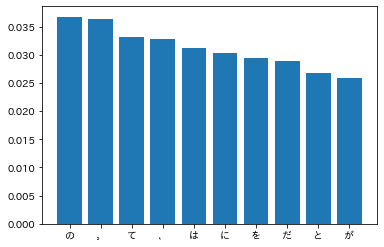

In [37]:
values = list(count_dict.values())
keys = [str(key[0]) for key in list(count_dict.keys())]

plt.bar(range(10), values[:10], tick_label=keys[:10])
plt.show()

## 37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

共起の定義が書かれていないため、とりあえず「猫」の前後に来る単語を共起しているとみなします。

In [40]:
cocat_morpheme_list = []

for i, morpheme in enumerate(morpheme_list):
    if morpheme["base"] == "猫":
        cocat_morpheme_list.append(morpheme_list[i-1])
        cocat_morpheme_list.append(morpheme_list[i+1])
        
count_dict = OrderedDict({})
for morpheme in cocat_morpheme_list:
    base = morpheme["base"]
    pos = morpheme["pos"]
    if (base, pos) in count_dict.keys():
        count_dict[(base, pos)] += 1
    else:
        count_dict[(base, pos)] = 1
total_words = sum(count_dict.values())
for key in count_dict.keys():
    count_dict[key] /= total_words
count_dict = OrderedDict(sorted(count_dict.items(), key=lambda x:x[1], reverse=True))
print(count_dict)

OrderedDict([(('の', '助詞'), 0.15120967741935484), (('だ', '助動詞'), 0.08266129032258064), (('は', '助詞'), 0.07258064516129033), (('に', '助詞'), 0.056451612903225805), (('が', '助詞'), 0.05443548387096774), (('と', '助詞'), 0.05443548387096774), (('、', '記号'), 0.05040322580645161), (('。', '記号'), 0.04435483870967742), (('を', '助詞'), 0.020161290322580645), (('も', '助詞'), 0.018145161290322582), (('で', '助詞'), 0.018145161290322582), (('より', '助詞'), 0.016129032258064516), (('この', '連体詞'), 0.016129032258064516), (('等', '名詞'), 0.014112903225806451), (('じゃ', '助詞'), 0.014112903225806451), (('だって', '助詞'), 0.014112903225806451), (('など', '助詞'), 0.014112903225806451), (('として', '助詞'), 0.010080645161290322), (('いる', '動詞'), 0.010080645161290322), (('から', '助詞'), 0.010080645161290322), (('ながら', '助詞'), 0.008064516129032258), (('た', '助動詞'), 0.008064516129032258), (('属', '名詞'), 0.008064516129032258), (('*', '名詞'), 0.006048387096774193), (('吾輩', '名詞'), 0.006048387096774193), (('その', '連体詞'), 0.006048387096774193), (('誉', '名詞'), 

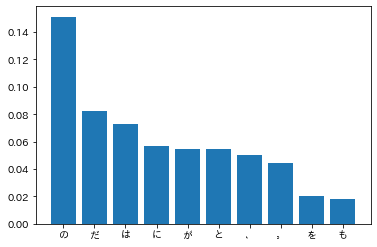

In [41]:
values = list(count_dict.values())
keys = [str(key[0]) for key in list(count_dict.keys())]

plt.bar(range(10), values[:10], tick_label=keys[:10])
plt.show()

名詞と動詞と形容詞に限定してみる。

OrderedDict([(('この', '連体詞'), 0.10126582278481013), (('等', '名詞'), 0.08860759493670886), (('いる', '動詞'), 0.06329113924050633), (('属', '名詞'), 0.05063291139240506), (('*', '名詞'), 0.0379746835443038), (('吾輩', '名詞'), 0.0379746835443038), (('その', '連体詞'), 0.0379746835443038), (('誉', '名詞'), 0.0379746835443038), (('族', '名詞'), 0.02531645569620253), (('黒', '名詞'), 0.02531645569620253), (('中', '名詞'), 0.02531645569620253), (('児', '名詞'), 0.02531645569620253), (('雄', '名詞'), 0.02531645569620253), (('庸', '名詞'), 0.02531645569620253), (('その後', '名詞'), 0.012658227848101266), (('永い', '形容詞'), 0.012658227848101266), (('盲', '名詞'), 0.012658227848101266), (('大きな', '連体詞'), 0.012658227848101266), (('乱暴', '名詞'), 0.012658227848101266), (('やすい', '形容詞'), 0.012658227848101266), (('どの', '連体詞'), 0.012658227848101266), (('あら', '名詞'), 0.012658227848101266), (('憎らしい', '形容詞'), 0.012658227848101266), (('薄ぎたない', '形容詞'), 0.012658227848101266), (('可愛らしい', '形容詞'), 0.012658227848101266), (('なに', '名詞'), 0.012658227848101266), (('無性', 

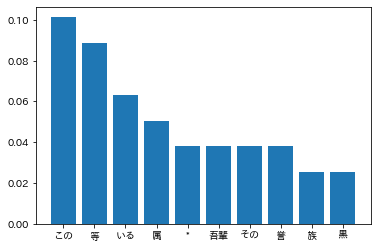

In [44]:
count_dict = OrderedDict({})
for morpheme in cocat_morpheme_list:
    base = morpheme["base"]
    pos = morpheme["pos"]
    if not pos in ["名詞", "動詞", "形容詞", "連体詞"]:
        continue
    if (base, pos) in count_dict.keys():
        count_dict[(base, pos)] += 1
    else:
        count_dict[(base, pos)] = 1
total_words = sum(count_dict.values())
for key in count_dict.keys():
    count_dict[key] /= total_words
count_dict = OrderedDict(sorted(count_dict.items(), key=lambda x:x[1], reverse=True))
print(count_dict)

values = list(count_dict.values())
keys = [str(key[0]) for key in list(count_dict.keys())]

plt.bar(range(10), values[:10], tick_label=keys[:10])
plt.show()

## 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

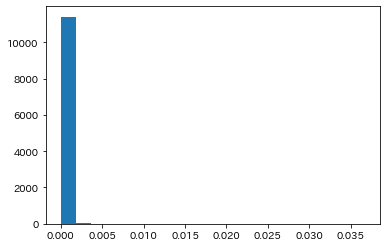

In [46]:
count_dict = OrderedDict({})
for morpheme in morpheme_list:
    base = morpheme["base"]
    pos = morpheme["pos"]
    if (base, pos) in count_dict.keys():
        count_dict[(base, pos)] += 1
    else:
        count_dict[(base, pos)] = 1
total_words = sum(count_dict.values())
for key in count_dict.keys():
    count_dict[key] /= total_words
count_dict = OrderedDict(sorted(count_dict.items(), key=lambda x:x[1], reverse=True))

values = list(count_dict.values())

plt.hist(values, bins=20)
plt.show()

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

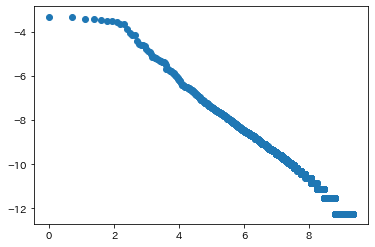

In [48]:
import math

log_values = [math.log(value) for value in values]
log_rank = [math.log(rank) for rank in range(1, len(values)+1)]

plt.scatter(log_rank, log_values)
plt.show()